In [54]:
import numpy as np
import glio
import matplotlib.pyplot as plt
import h5py as h5

In [32]:
#This function uses glio to load the particle data from the Gadget files 
#Recieves the number of the snapshot to load and the directory where the snapshots are located
#Returns the particles properties and the time of the snapshot
def load_particles( n_snapshot, input_dir):
    file_name = input_dir + f'snapshot_{n_snapshot:03}'
    print( 'Loading file: ', file_name )
    file = glio.GadgetSnapshot( file_name )
    file.load()
    head = file.header
    box_size = head.BoxSize
    current_z = head.redshift
    particle_type = 1                                   #Select dark matter particles (1) 
    positions = file.pos[particle_type]                 #Positions of dark matter particles
    mass = file.mass[particle_type]   * 1e10            #Mass of dark matter particles in Msolar
    positions_all = positions.transpose()                
    pos_z = positions_all[0]
    pos_y = positions_all[1]
    pos_x = positions_all[2]
    return mass, pos_x, pos_y, pos_z, current_z

In [33]:
def plot_particles( depth, pos_x, pos_y, pos_z, output_directory):
    indxs = np.where( pos_z < depth)            #Select only the particles with z<depth
    pos_x_small = pos_x[indxs]                  #positions X of selected particles
    pos_y_small = pos_y[indxs]                  #positions Y of selected particles

    fig = plt.figure(0)
    fig.clf()
    fig.set_size_inches(20,20)
    plt.tight_layout()
    axis = plt.gca()
    axis.set_xlim(0, 100000)
    axis.set_ylim(0, 100000)
    fig.axes[0].get_yaxis().set_visible(False)
    fig.axes[0].get_xaxis().set_visible(False)
    axis.scatter( pos_x_small, pos_y_small, s=0.002)   #Plot points for the particles 
    image_name = f'particles_{n_snapshot}.png'
    fig.savefig( output_directory + image_name,  pad_inches=0,  bbox_inches='tight', dpi=100 ) #Save the image
    print( "Saved image: ", output_directory + image_name )

In [55]:
def get_density( mass, pos_x, pos_y, pos_z, Lbox, nx, ny, nz ):
    dx = Lbox / nx
    dy = Lbox / ny
    dz = Lbox / nz
    dvol = dx * dy * dz
    density = np.zeros( [nx, ny, nz])

    indxs_x = ( pos_x / dx ).astype(np.int)
    indxs_y = ( pos_y / dy ).astype(np.int)
    indxs_z = ( pos_z / dz ).astype(np.int)

    total_particles = len( mass )

    for n_particle in range( total_particles ):
        indx_x = indxs_x[n_particle]
        indx_y = indxs_y[n_particle]
        indx_z = indxs_z[n_particle]
        part_mass = mass[n_particle]
        density[indx_z, indx_y, indx_x ] += part_mass

    density = density / dvol
    return density

Loading file:  data/128_dm/snapshot_200
0.0 127777.86193911743 86.33639320210631


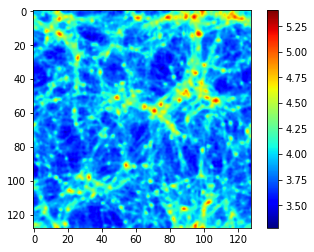

In [56]:
input_dir = 'data/128_dm/'
output_directory = 'images/'

n_snapshot = 200
mass, pos_x, pos_y, pos_z, current_z = load_particles( n_snapshot, input_dir)

nx = 128
ny = 128
nz = 128

Lbox = 100000 #kpc

density = get_density( mass, pos_x, pos_y, pos_z, Lbox, nx, ny, nz )

densi_proj = density.sum( axis=0)

image_name = output_directory + f'density_{n_snapshot:03}.png'
plt.imshow( np.log10(densi_proj), interpolation='bicubic', cmap='jet' )
plt.colorbar()
plt.savefig( image_name)
    
print( density.min(), density.max(), density.mean(), )



Loading file:  data/128_dm/snapshot_000
Saved image:  images/particles_0.png
Loading file:  data/128_dm/snapshot_001
Saved image:  images/particles_1.png
Loading file:  data/128_dm/snapshot_002
Saved image:  images/particles_2.png
Loading file:  data/128_dm/snapshot_003
Saved image:  images/particles_3.png
Loading file:  data/128_dm/snapshot_004
Saved image:  images/particles_4.png
Loading file:  data/128_dm/snapshot_005
Saved image:  images/particles_5.png
Loading file:  data/128_dm/snapshot_006
Saved image:  images/particles_6.png
Loading file:  data/128_dm/snapshot_007
Saved image:  images/particles_7.png
Loading file:  data/128_dm/snapshot_008
Saved image:  images/particles_8.png
Loading file:  data/128_dm/snapshot_009
Saved image:  images/particles_9.png
Loading file:  data/128_dm/snapshot_010
Saved image:  images/particles_10.png
Loading file:  data/128_dm/snapshot_011
Saved image:  images/particles_11.png
Loading file:  data/128_dm/snapshot_012
Saved image:  images/particles_12.

Saved image:  images/particles_105.png
Loading file:  data/128_dm/snapshot_106
Saved image:  images/particles_106.png
Loading file:  data/128_dm/snapshot_107
Saved image:  images/particles_107.png
Loading file:  data/128_dm/snapshot_108
Saved image:  images/particles_108.png
Loading file:  data/128_dm/snapshot_109
Saved image:  images/particles_109.png
Loading file:  data/128_dm/snapshot_110
Saved image:  images/particles_110.png
Loading file:  data/128_dm/snapshot_111
Saved image:  images/particles_111.png
Loading file:  data/128_dm/snapshot_112
Saved image:  images/particles_112.png
Loading file:  data/128_dm/snapshot_113
Saved image:  images/particles_113.png
Loading file:  data/128_dm/snapshot_114
Saved image:  images/particles_114.png
Loading file:  data/128_dm/snapshot_115
Saved image:  images/particles_115.png
Loading file:  data/128_dm/snapshot_116
Saved image:  images/particles_116.png
Loading file:  data/128_dm/snapshot_117
Saved image:  images/particles_117.png
Loading file:

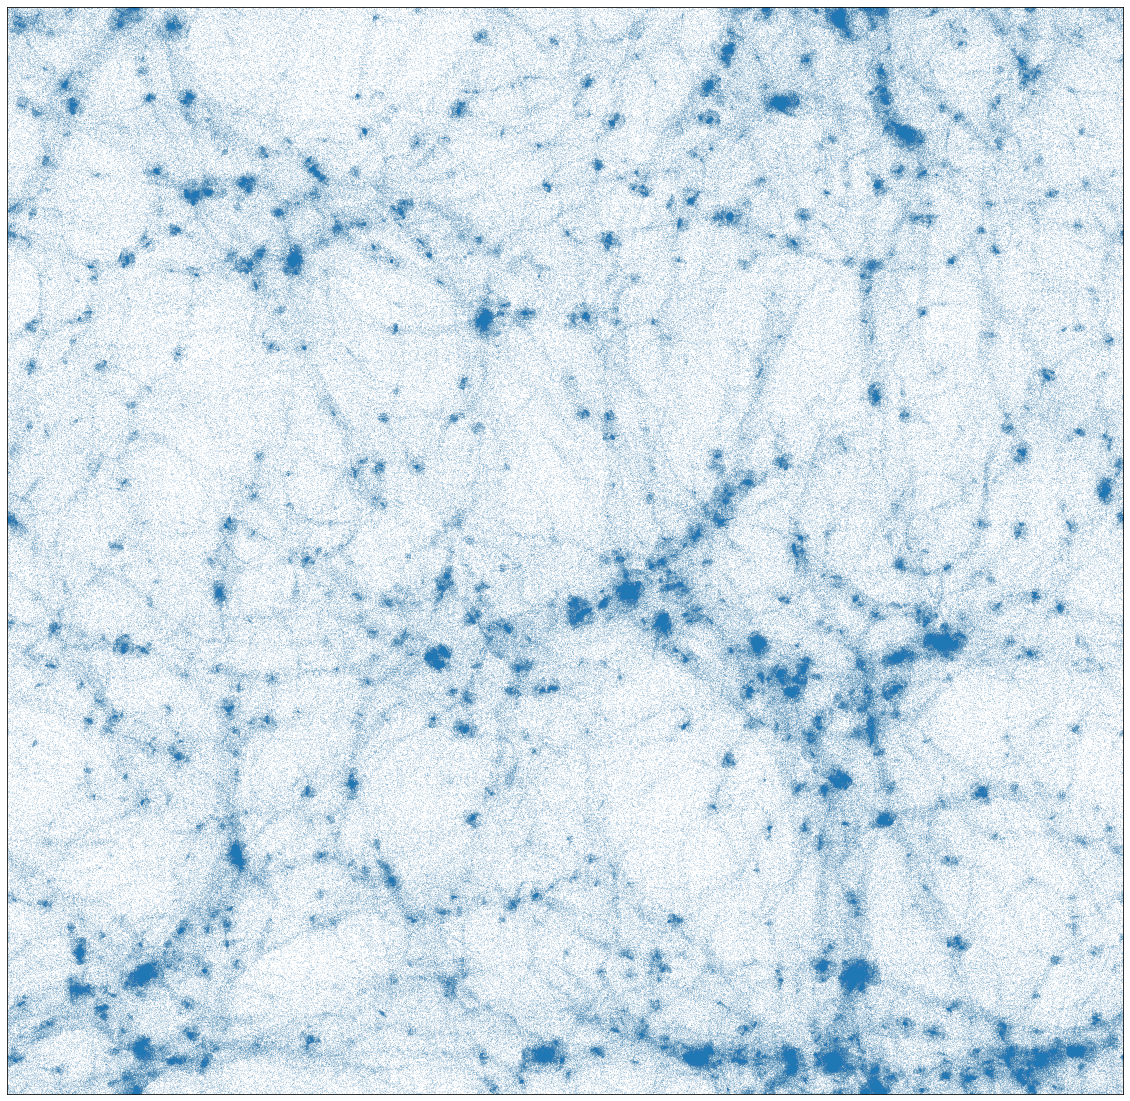

In [4]:
input_dir = 'data/128_dm/'
output_directory = 'images/'
depth = 100000 

#Loop over all the snapshots.
#For each snapshot load the particles data and plot the positions
for n_snapshot in range(0,201):
    mass, pos_x, pos_y, pos_z, current_z = load_particles( n_snapshot, input_dir)
    plot_particles( depth, pos_x, pos_y, pos_z, output_directory)


